ТУТ демонстрируется концепция сегментации набора данных клиентов с сайта электронной коммерции с использованием кластеризации k-средних в python. Набор данных содержит годовой доход ~ 300 клиентов и их ежегодные расходы на сайте электронной коммерции. Набор данных состоит из годового дохода (в долларах США) и их общих расходов (в долларах США) на сайте электронной торговли за период в один год. 


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns; sns.set()  
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [8]:
dataset=pd.read_csv('CLV.csv')

In [9]:
dataset.head()

,DOHODY,RASHODY
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [10]:
len(dataset) 

303

In [11]:
dataset.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
DOHODY,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
RASHODY,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


Набор данных состоит из 303 строк. Средний годовой доход составляет 245000 долларов, а среднегодовые расходы - 149000 долларов. Распределение годового дохода и ежегодных расходов было проиллюстрировано на графике и графике для скрипки. Набор данных состоит из 303 строк. Средний годовой доход составляет 245000 долларов, а среднегодовые расходы - 149000 долларов. Распределение годового дохода и ежегодных расходов было проиллюстрировано на графике и скрипке.


Text(0.5,0,'DOHODY / RASHODY')

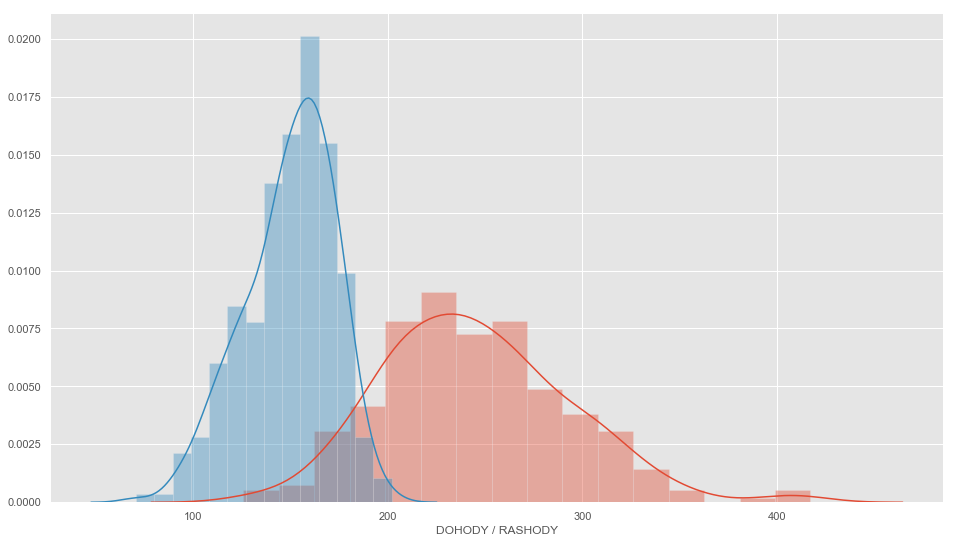

In [12]:
#Visualising the data
plot_income = sns.distplot(dataset["DOHODY"])
plot_spend = sns.distplot(dataset["RASHODY"])
plt.xlabel('DOHODY / RASHODY')

[(0, 420)]

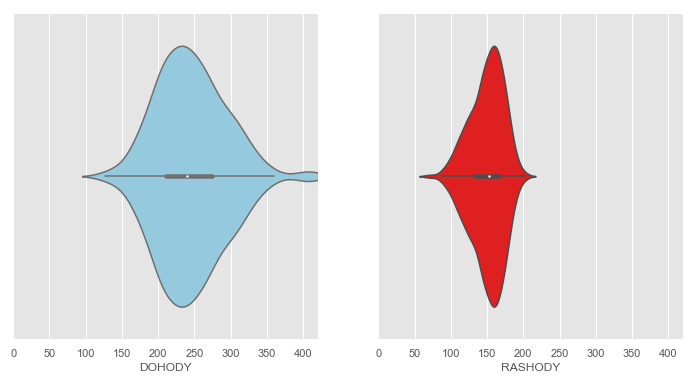

In [14]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=dataset, x='DOHODY', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=dataset, x='RASHODY',color="red", ax=axes[1])
v1.set(xlim=(0,420))

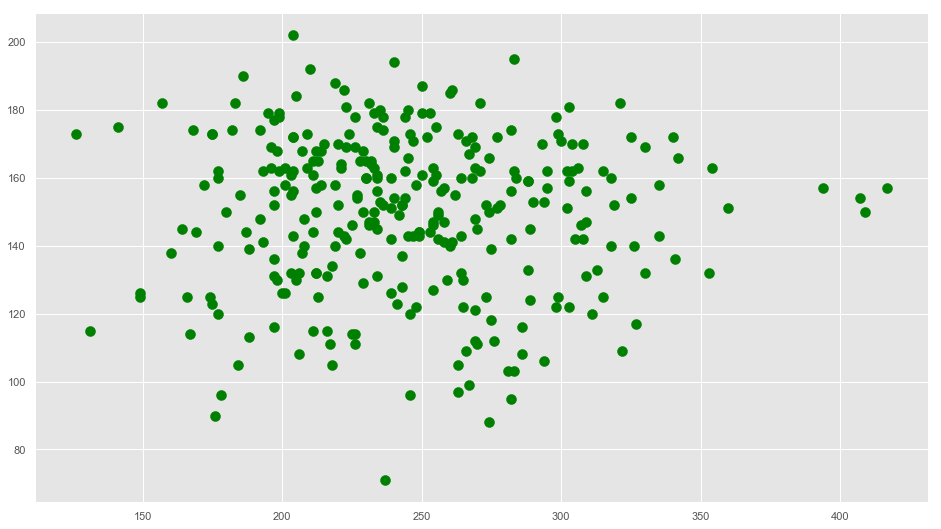

In [15]:
Income = dataset['DOHODY'].values
Spend = dataset['RASHODY'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c='green', s=100)

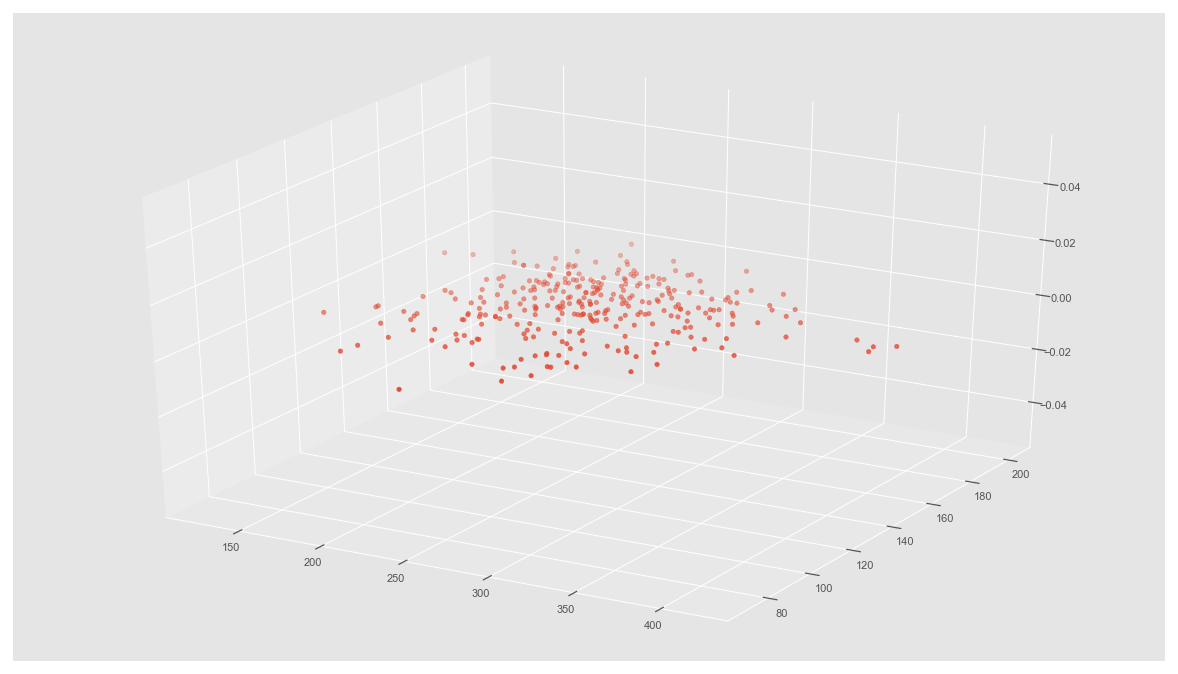

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1])

Clustering fundamentals

In [17]:
X=dataset.iloc[:,[0,1]].values

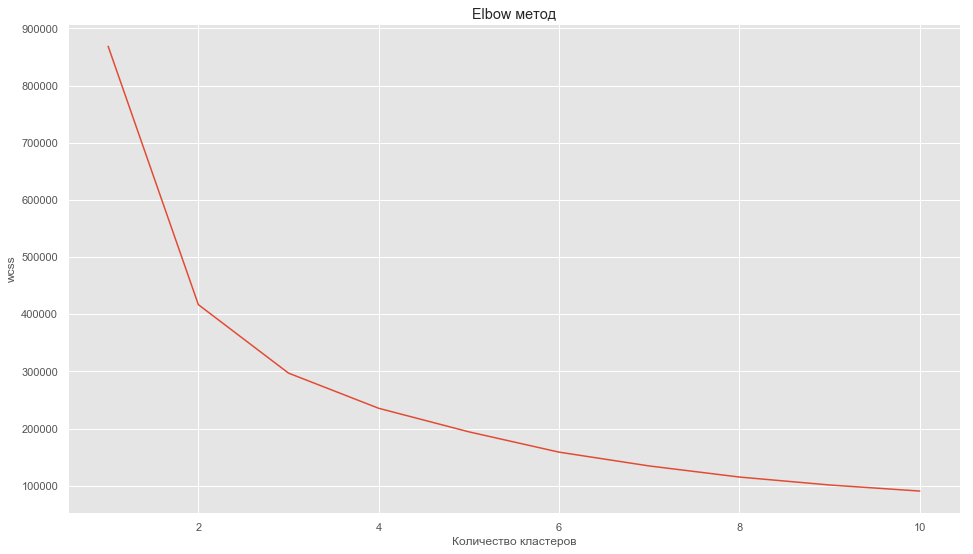

In [19]:
#найти идеальное количество кластеров
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow метод')
plt.xlabel('Количество кластеров')
plt.ylabel('wcss')
plt.show()

In [20]:
#Расчет коэффициента 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.44006694211403197
For n_clusters=3, The Silhouette Coefficient is 0.35962629048722355
For n_clusters=4, The Silhouette Coefficient is 0.37171556971658903
For n_clusters=5, The Silhouette Coefficient is 0.3612692625882372
For n_clusters=6, The Silhouette Coefficient is 0.36533003209090464
For n_clusters=7, The Silhouette Coefficient is 0.3421687902982076
For n_clusters=8, The Silhouette Coefficient is 0.3549809547498984
For n_clusters=9, The Silhouette Coefficient is 0.3551752972615442
For n_clusters=10, The Silhouette Coefficient is 0.352503730311807


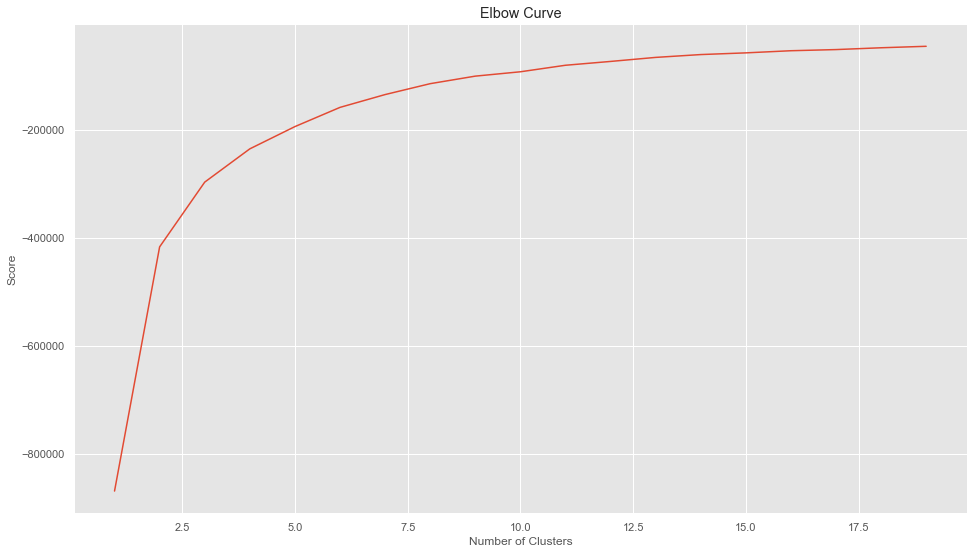

[-868805.478547855, -416914.67764462164, -297101.3764201936, -235527.78250698216, -194351.57969685292, -158791.29069416836, -135075.6838240049, -114907.0960742363, -100948.50284633104, -92896.1471183829, -80828.81791716456, -73747.44014445711, -66289.97441334685, -61036.86331718271, -57896.23636992665, -53939.65790400817, -51808.26269114841, -48453.52003203378, -45736.37274595784]


In [21]:
import pylab as pl
from sklearn.decomposition import PCA

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

print(score)

In [22]:
for k in range (1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
print()

k: 1  cost: 868805.4785478548
k: 2  cost: 416914.67764462065
k: 3  cost: 297101.3764201943
k: 4  cost: 235568.75630353513
k: 5  cost: 193333.51167275637
k: 6  cost: 158999.20745160058
k: 7  cost: 135314.10167803388
k: 8  cost: 115686.57935998778
k: 9  cost: 102546.93727877043
k: 10  cost: 91556.28599714936



In [23]:
##Подгонка kmeans к набору данных
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

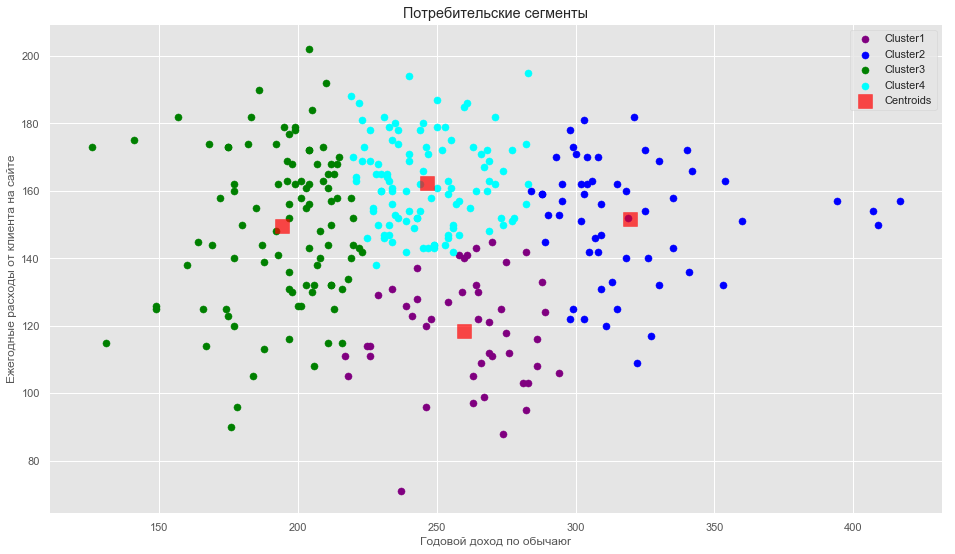

In [24]:
#Визуализация кластеров для k = 4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Потребительские сегменты')
plt.xlabel('Годовой доход по обычаюr')
plt.ylabel('Ежегодные расходы от клиента на сайте')
plt.legend()
plt.show()

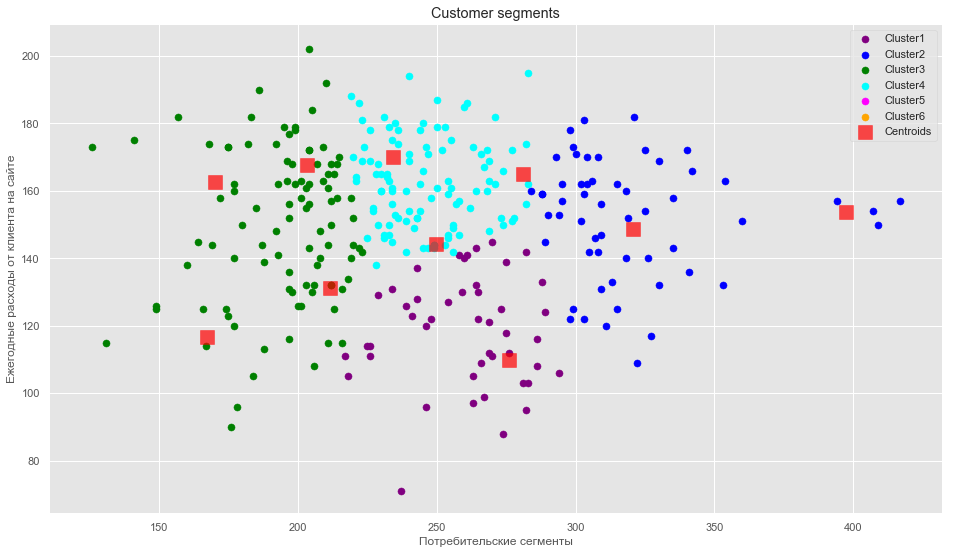

In [25]:
#Визуализация кластеров
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster6')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Потребительские сегменты')
plt.ylabel('Ежегодные расходы от клиента на сайте')
plt.legend()
plt.show()

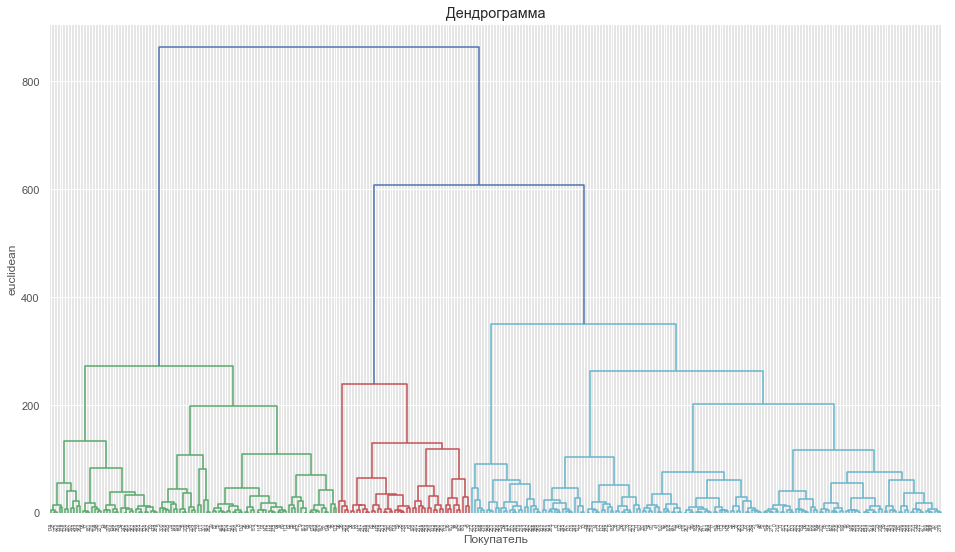

In [26]:
# Использование дендрограммы для поиска оптимального количества кластеров
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Дендрограмма")
plt.xlabel('Покупатель')
plt.ylabel('euclidean')
plt.show()

In [29]:
# Подгонка иерархической кластеризации к набору данных
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward' )
y_hc = hc.fit_predict(X)

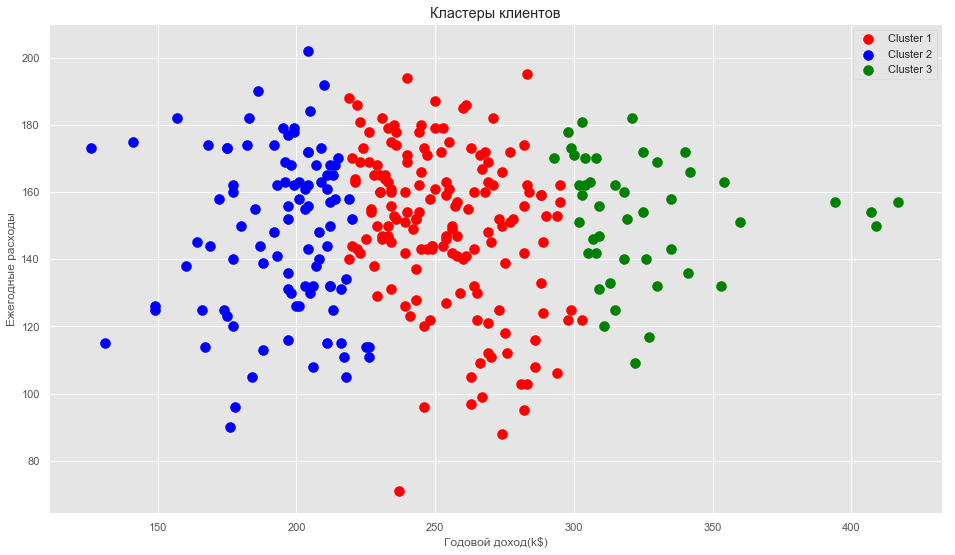

In [28]:
# Визуализация кластеров
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Кластеры клиентов')
plt.xlabel('Годовой доход(k$)')
plt.ylabel('Ежегодные расходы')
plt.legend()
plt.show()